In [ ]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 15.1 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
img=cv2.imread("/Data/image3.jpeg")

In [ ]:
img

array([[[163, 159, 135],
        [164, 160, 136],
        [164, 160, 136],
        ...,
        [165, 151, 122],
        [165, 151, 122],
        [165, 151, 123]],

       [[152, 148, 124],
        [153, 149, 125],
        [154, 150, 126],
        ...,
        [164, 150, 121],
        [164, 150, 121],
        [165, 151, 123]],

       [[149, 145, 121],
        [150, 146, 122],
        [151, 147, 123],
        ...,
        [165, 154, 124],
        [166, 155, 125],
        [167, 155, 127]],

       ...,

       [[159, 160, 144],
        [164, 165, 149],
        [113, 115,  96],
        ...,
        [ 95,  93,  82],
        [101,  99,  88],
        [107, 105,  94]],

       [[132, 133, 117],
        [123, 124, 108],
        [107, 109,  90],
        ...,
        [ 80,  78,  67],
        [ 82,  80,  69],
        [ 85,  83,  72]],

       [[123, 124, 108],
        [ 97,  98,  82],
        [115, 117,  98],
        ...,
        [ 89,  87,  76],
        [ 87,  85,  74],
        [ 85,  83,  72]]

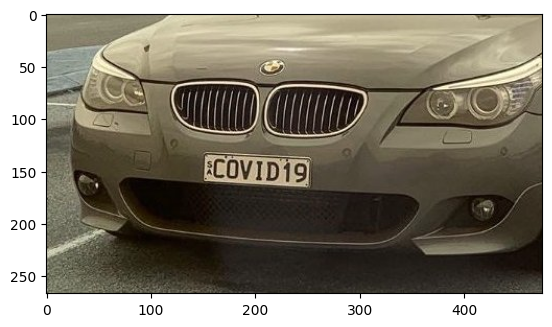

In [ ]:
plt.imshow(img)

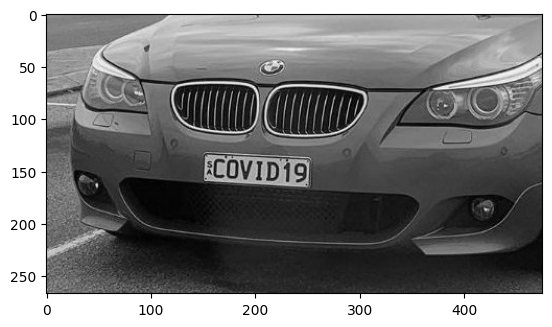

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

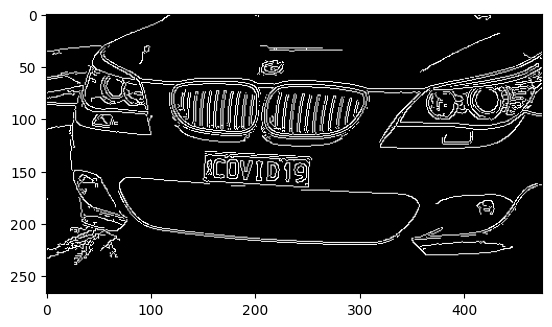

In [ ]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [ ]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [ ]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break

In [ ]:
location

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [ ]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)


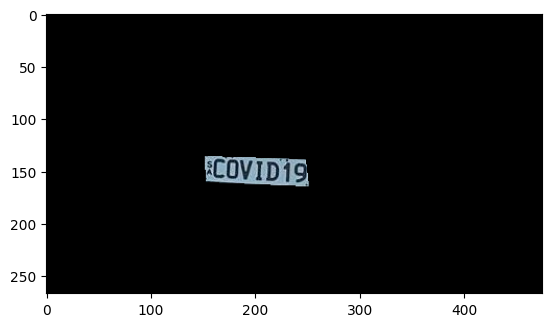

In [ ]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

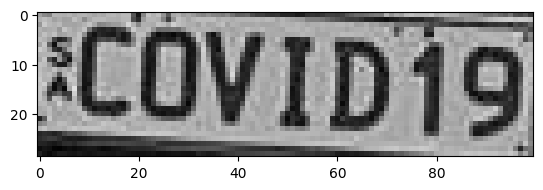

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [ ]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [100, 0], [100, 29], [0, 29]], 'ICOVIDT9', 0.5350360356483381)]

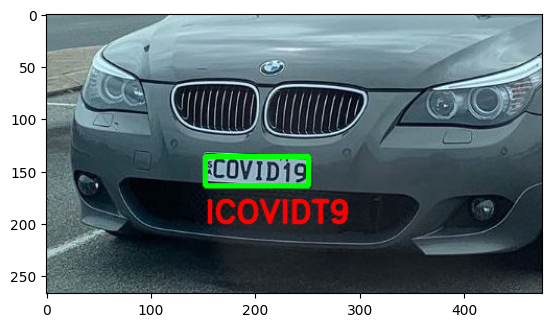

In [ ]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_DUPLEX
res=cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,0,255),thickness=2,lineType=cv2.LINE_AA)
res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))